In [0]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

1 - Considere a base BostonHousing. Compare o coeficiente R2 obtido através de regressão linear múltipla, Lasso e ridge regression. Para os métodos Lasso e ridge regression, faça um gráfico de 𝛼×
R2 como foi feito nos exemplos anteriores.

In [0]:
# realiza a leitura dos dados
df = pd.read_csv('data/BostonHousing.csv')

# listamos as 10 primeiras linhas do arquivo
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
# separamos as variaveis X e y
# usamos a variavel 'medv' como target do nosso problema de regressão
X = df.drop(columns='medv')
y = df['medv']

In [0]:
# divide o conjunto em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
# instancia o modelo de regressao linear multipla
linreg = LinearRegression()

# ajusta os dados do conjunto de treinamento
linreg.fit(X_train, y_train)

# preve o target para os dados de teste
y_pred_linreg = linreg.predict(X_test)

# calcula o r2 score do modelo de regressao linear multipla
r2_linreg = r2_score(y_test, y_pred_linreg)

In [0]:
# armazena os r2 score de cada alpha
all_r2_lasso = []
all_r2_ridge = []
all_alpha = np.arange(0.1, 3.1, 0.1)

for alpha in all_alpha:
    # instancia os modelos lasso e ridge
    lasso = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
    ridge = Ridge(alpha=alpha, normalize=True)
    
    # ajusta o modelo aos dados de treinamento
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    # preve o target para os dados de teste
    y_pred_lasso = lasso.predict(X_test)
    y_pred_ridge = ridge.predict(X_test)
    
    # calcula o r2 score dos dois modelos
    r2_lasso = r2_score(y_test, y_pred_lasso)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    
    # adiciona o score dos 2 modelos
    all_r2_lasso.append(r2_lasso)
    all_r2_ridge.append(r2_ridge)

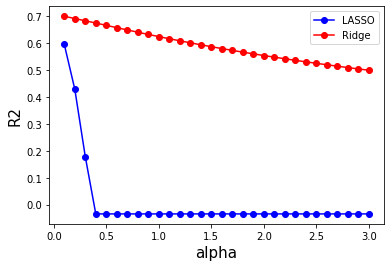

In [0]:
# plota o grafica entre r2 (eixo y) e alpha (eixo x) dos modelos Lasso (azul) e Ridge (vermelho)

plt.plot(all_alpha, all_r2_lasso, '-bo', label='LASSO')
plt.plot(all_alpha, all_r2_ridge, '-ro', label='Ridge')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.legend()
plt.show(True)

Note que para este dataset, o modelo Ridge diminui a pontuação $R^2$ lentamente em relação ao Lasso

In [0]:
# Exibimos a melhor pontucao R2 dos 3 modelos avaliados
# O modelo de regressão linear simples apresenda o melhor resultado
print('LinReg:', r2_linreg)
print('LASSO:', np.max(all_r2_lasso))
print('Ridge:', np.max(all_r2_ridge))

LinReg: 0.7112260057484903
LASSO: 0.5950229535328551
Ridge: 0.6996938275127311


2 - Para os dados gerados pelo código abaixo, ajuste um modelo de regressão não-linear considerando um polinômio de grau 3, conforme feito na aula.

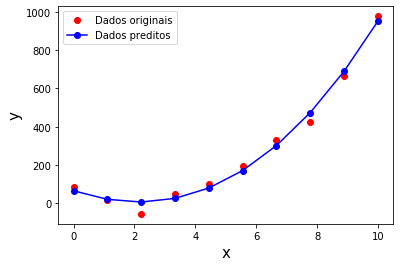

In [0]:
# geramos os dados X e y
N = 10
X = np.linspace(0, 10, N)
y_true = X**3 + np.random.normal(0, 50, N)

# geramos as features polinomiais de grau 3 no conjunto de dados X
pf3 = PolynomialFeatures(degree=3, include_bias=False)
X_pf3 = pf3.fit_transform(X.reshape(-1, 1))

# instanciamos, ajustamos e predizemos os valores
linreg = LinearRegression()
linreg.fit(X_pf3, y_true)
y_pred = linreg.predict(X_pf3)

# Apresentamos os valores originais e preditos no grafico
plt.plot(X, y_true, 'ro', label='Dados originais')
plt.plot(X, y_pred, 'bo-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)

3 - Determine as variáveis que mais influenciam o preço de imóveis em Boston usando Lasso.

In [0]:

# utilizamos alpha=0.1 por ser o valor que reportou maior r2 nos exemplos anteriores
lasso = Lasso(alpha=0.1, normalize=True, max_iter=1e5)

# reutilizamos o nosso conjunto de treino do dataset Boston para realizarmos o ajuste
lasso.fit(X_train, y_train)

# exibimos os coeficientes de cada variavel
for col, param in zip(X_train.columns, lasso.coef_):
    print('{}\t{:.2f}'.format(col, param))

crim	-0.00
zn	0.00
indus	-0.00
chas	0.00
nox	-0.00
rm	3.19
age	-0.00
dis	-0.00
rad	-0.00
tax	-0.00
ptratio	-0.31
b	0.00
lstat	-0.49


Podemos notar que as variáveis que mais influeciam nos preços dos imóveis são: 'lstat', 'ptratio' e 'rm'